#**<center>HEART DISEASE PREDICTION <br>USING <br>MACHINE LEARNING<center/>**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible CVD.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The aim of this project is to implement few machine learning models to predict whether a patient has an underlying heart disease based on some given features.

Features:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

Output:
1. HeartDisease: output class [1: heart disease, 0: Normal]

#####**Some standard libraires used throughout the project:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
cp = sns.color_palette('rocket')

##**1. Importing data and some basic information**

#####**1.1 Loading csv data into a pandas dataframe**

In [2]:
df = pd.read_csv('heart.csv')

#####**1.2 Overview of the data**

First five rows:

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Last five rows:

In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Randomly selected five rows:

In [5]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
726,41,M,ATA,110,235,0,Normal,153,N,0.0,Up,0
590,63,M,ATA,136,165,0,ST,133,N,0.2,Up,0
504,62,M,ASY,158,210,1,Normal,112,Y,3.0,Down,1
143,53,M,ASY,140,243,0,Normal,155,N,0.0,Up,0
827,43,F,NAP,122,213,0,Normal,165,N,0.2,Flat,0


#####**1.3 Dimension of the dataframe**

In [6]:
print("No of rows:",df.shape[0])
print("No of columns:",df.shape[1])

No of rows: 918
No of columns: 12


##**2. Feature Information**

#####**2.1 List of Numerical features**

In [7]:
numerical = df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
for i in numerical:
  print(i)

Age
RestingBP
Cholesterol
FastingBS
MaxHR
Oldpeak


#####**2.2 Statistical Information of Numerical features**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


#####**2.3 List of Catagorical features**

In [9]:
catagorical = df.select_dtypes('object').columns
for i in catagorical:
  print(i)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


#####**2.4 No of unique values in each Catagorical feature**

In [10]:
df[catagorical].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

##**3. Checking for Missing and Duplicated Values**

#####**3.1 Checking for missing values**

In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values present in our dataset.

#####**3.2 Checking for duplicated values**

In [12]:
df.duplicated().sum()

0

There are no duplicated rows in our dataset.

##**4.Handling Outliers**

Plot showing Interquartile Range of different numerical Features: 



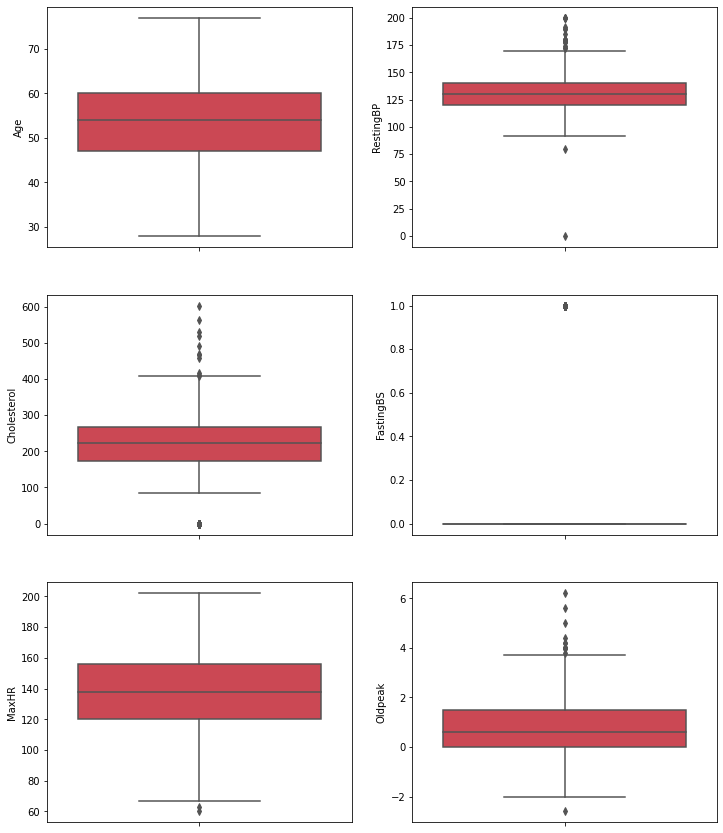

In [13]:
print("Plot showing Interquartile Range of different numerical Features: \n")
plt.figure(figsize=(12,15))
for i in range(len(numerical)):
  plt.subplot(3, 2, i+1)
  sns.boxplot(data=df, y=numerical[i], color=cp[3])
plt.show()

Except Age every features have data points beyond the IQR (Interquartile Range). Fasting blood sugar can be ignored since its a binary value. But whether to call them a outlier or not requires some expertise of the field. 

So with some research I found that:
* a person may have very high cholesterol (>500 mg/dl) but cannot have 0 
cholestrol
* a person may have very resting blood pressure (>180 mm of Hg) but cannot have 0 resting blood pressure
* ST depression should not be >5

But such extreme values of samples can cause problem for training ML model so I will remove such values. Here I will not be imputing outliers with mean since medical data is highly sensitive.

In [14]:
df = df[(df['RestingBP']<=180)&(df['RestingBP']>0)]
df = df[(df['Cholesterol']<=500)&(df['Cholesterol']>0)]
df = df[df['Oldpeak']<=5]

##**5. Checking for Balanced Dataset**

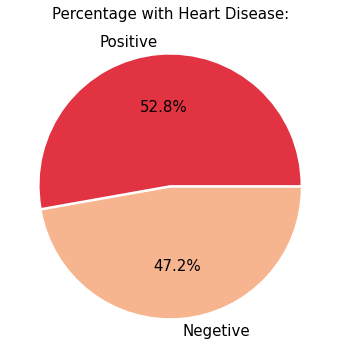

In [15]:
plt.figure(figsize=(6,6))
plt.title('Percentage with Heart Disease:', fontsize=15)
plt.pie(df['HeartDisease'].value_counts(), autopct='%1.1f%%', labels=['Positive', 'Negetive'], colors=[cp[3], cp[5]], textprops={'fontsize': 15}, explode=[0.02, 0])
plt.show()

As the number of people with heart disease (52.8%) and number of people without heart disease (47.2%) are comparable, there are no imbalances in our dataset.

##**6. Correlation Matrix**

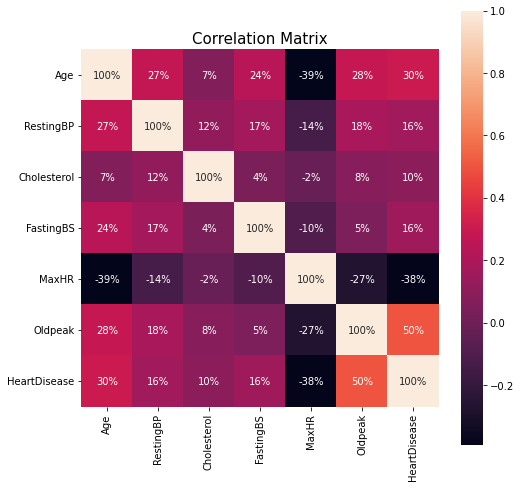

In [16]:
plt.figure(figsize=(8,8))
plt.title("Correlation Matrix", fontsize=15)
sns.heatmap(df.corr(), cmap='rocket', square=True, annot=True, fmt='.0%')
plt.show()

The correlation value signifies how much two features are related, for example:

* 100% means strongly positively related
* -100% means strongly negetively related
* 0% means not at all related

Here, the maximum positive correlation value is 50% between Oldpeak and HeartDisease, which is quite less. If the value is very high (say, 95%) then it is adviced to remove one of the features as it can cause problem to model interpretation.

##**7. Data Visualization**

#####**7.1 Gender vs Heart Disease**

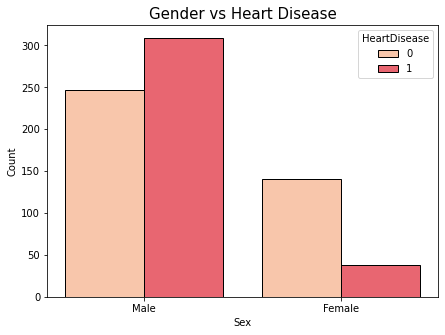

In [17]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='Sex', hue='HeartDisease', multiple='dodge', shrink=0.8, palette=[cp[5], cp[3]])
plt.xticks(['M','F'], ['Male', 'Female'])
plt.title("Gender vs Heart Disease", fontsize=15)
plt.show()

Male gender is more at risk of Heart Disease than Female.

#####**7.2 Chest Pain Type vs Heart Disease**

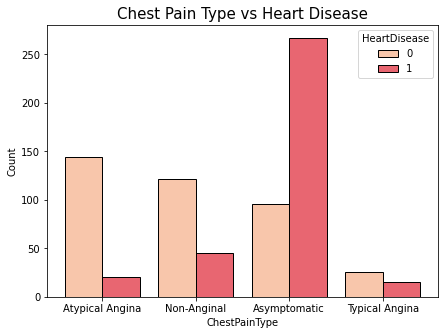

In [18]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='ChestPainType', hue='HeartDisease', multiple='dodge', shrink=0.8, palette=[cp[5], cp[3]])
plt.xticks(['ATA','NAP','ASY','TA'], ['Atypical Angina','Non-Anginal','Asymptomatic','Typical Angina'])
plt.title("Chest Pain Type vs Heart Disease", fontsize=15)
plt.show()

Asymptomatic chest pain is most likely an indication of Heart Disease

#####**7.3 Cholesterol vs Heart Disease**

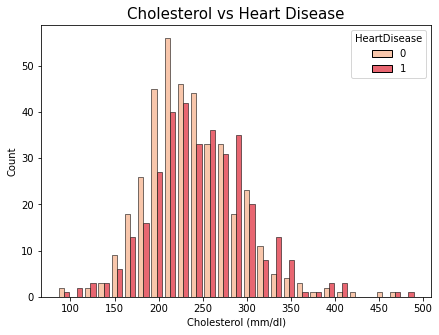

In [19]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', multiple='dodge', shrink=0.8, palette=[cp[5], cp[3]])
plt.xlabel('Cholesterol (mm/dl)')
plt.title("Cholesterol vs Heart Disease", fontsize=15)
plt.show()

#####**7.4 Age vs Heart Disease**

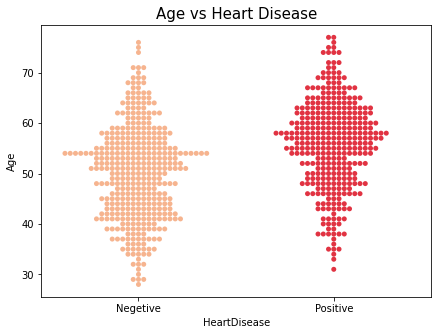

In [20]:
plt.figure(figsize=(7,5))
sns.swarmplot(data=df, x='HeartDisease', y='Age', palette=[cp[5], cp[3]])
plt.xticks([0,1], ['Negetive', 'Positive'])
plt.title("Age vs Heart Disease", fontsize=15)
plt.show()

Middle-aged patients are more at risk of Heart Disease.

#####**7.5 Fasting Blood Sugar vs Heart Disease**

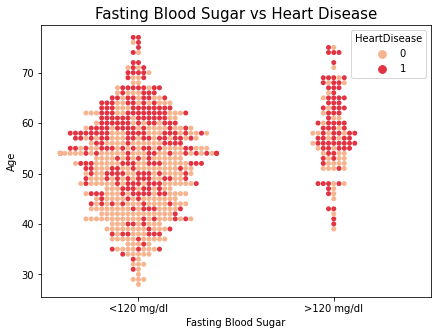

In [21]:
plt.figure(figsize=(7,5))
sns.swarmplot(data=df, x='FastingBS', y='Age', hue='HeartDisease', palette=[cp[5], cp[3]])
plt.xticks([0,1], ['<120 mg/dl', '>120 mg/dl'])
plt.xlabel('Fasting Blood Sugar')
plt.title("Fasting Blood Sugar vs Heart Disease", fontsize=15)
plt.show()

#####**7.6 Resting ECG vs Heart Disease**

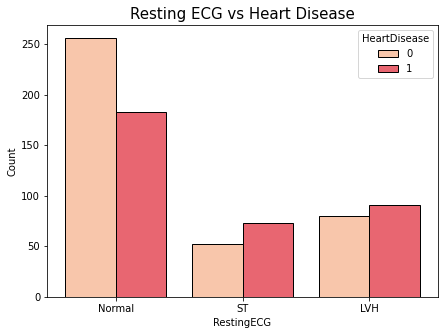

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='RestingECG', hue='HeartDisease', multiple='dodge', shrink=0.8, palette=[cp[5], cp[3]])
plt.title("Resting ECG vs Heart Disease", fontsize=15)
plt.show()

#####**7.7 ST Slope vs Heart Disease**

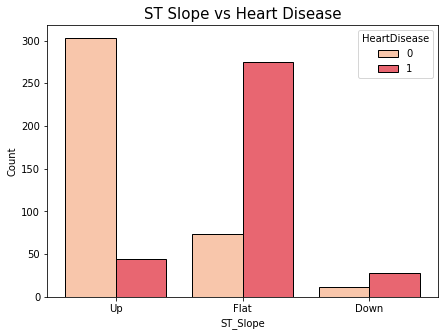

In [23]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='ST_Slope', hue='HeartDisease', multiple='dodge', shrink=0.8, palette=[cp[5], cp[3]])
plt.title("ST Slope vs Heart Disease", fontsize=15)
plt.show()

##**6. Selecting features and output for ML model**

In [24]:
x = df.iloc[:, 0:11].values
y = df.iloc[:, 11].values

No features are discarded.

##**7. Encoding Catagorical Data**

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
  if col in catagorical:
    x[:, df.columns.get_loc(col)] = encoder.fit_transform(x[:, df.columns.get_loc(col)])

##**8. Scaling Numerical Data**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

##**9. Splitting data into train and test sets**

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Size of test set is set to 20% of the total dataset.

##**10. Training Machine Learning Models**

Here I will be using three machine learning models:
* K-Nearest Neighbors Classifier
* Logistic Rrgression
* Support Vector Machine (two different kernels)

#####**10.1 K-Nearest Neighbors Classifier**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred_KNN = classifier.predict(x_test)

#####**10.2 Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(x_train, y_train)
y_pred_LR = regressor.predict(x_test)

#####**10.3 Support Vector Machine**

In [30]:
from sklearn.svm import SVC

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train, y_train)
y_pred_svm_sigmoid = svm_sigmoid.predict(x_test)

svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train, y_train)
y_pred_svm_poly = svm_poly.predict(x_test)

##**11. Accuracy of Machine Learning Models**

#####**11.1 Comparison of Accuracy Score of ML Models**

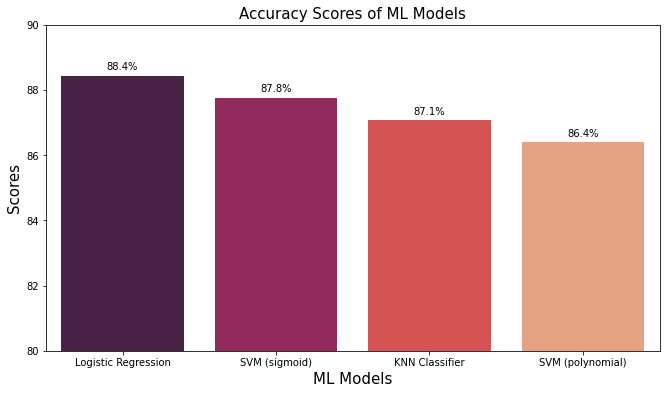

In [31]:
from sklearn.metrics import accuracy_score

models={}
models["KNN Classifier"] = accuracy_score(y_test, y_pred_KNN)*100
models["Logistic Regression"] = accuracy_score(y_test, y_pred_LR)*100
models["SVM (sigmoid)"] = accuracy_score(y_test, y_pred_svm_sigmoid)*100
models["SVM (polynomial)"] = accuracy_score(y_test, y_pred_svm_poly)*100

models_sorted = dict(sorted(models.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(11,6))
bars = sns.barplot(y=list(models_sorted.values()), x=list(models_sorted.keys()), palette='rocket')
plt.ylim([80, 90])
for p in bars.patches:
    bars.annotate('{:.1f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("ML Models", fontsize=15)
plt.ylabel("Scores", fontsize=15)
plt.title("Accuracy Scores of ML Models", fontsize=15)
plt.show()

#####**11.2 Comparison of Confusion Matrix**

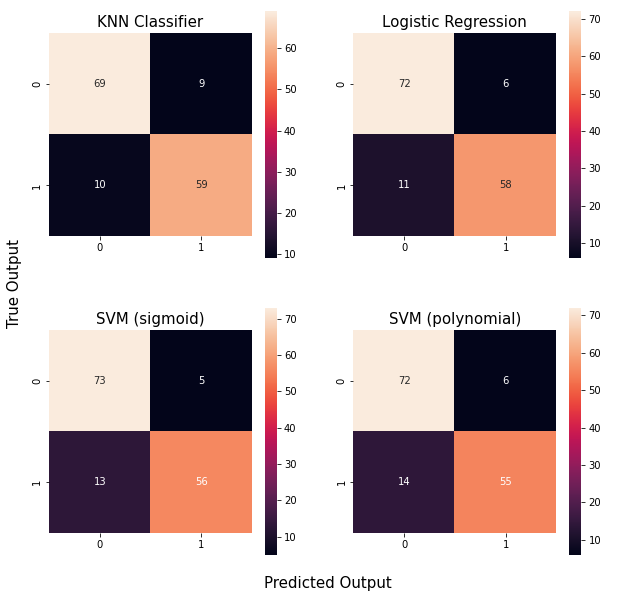

In [32]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.heatmap(confusion_matrix(y_test, y_pred_KNN), cmap='rocket', annot=True, square=True, ax=ax[0][0])
ax[0][0].set_title("KNN Classifier", fontsize=15)

sns.heatmap(confusion_matrix(y_test, y_pred_LR), cmap='rocket', annot=True, square=True, ax=ax[0][1])
ax[0][1].set_title("Logistic Regression", fontsize=15)

sns.heatmap(confusion_matrix(y_test, y_pred_svm_sigmoid), cmap='rocket', annot=True, square=True, ax=ax[1][0])
ax[1][0].set_title("SVM (sigmoid)", fontsize=15)

sns.heatmap(confusion_matrix(y_test, y_pred_svm_poly), cmap='rocket', annot=True, square=True, ax=ax[1][1])
ax[1][1].set_title("SVM (polynomial)", fontsize=15)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Predicted Output", fontsize=15)
plt.ylabel("True Output", fontsize=15)
plt.show()

###**In conclusion, Logistic Regresssion is the best model with an overall accuracy score of 88.4%**

In [33]:
!jupyter nbconvert --to html /content/heart.ipynb

[NbConvertApp] Converting notebook /content/heart.ipynb to html
[NbConvertApp] Writing 693884 bytes to /content/heart.html
